# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,Not Verified | British Airways stranding my w...
1,✅ Trip Verified | Although like many these d...
2,✅ Trip Verified | This flight was British Airw...
3,Not Verified | The worst airline I have ever f...
4,"✅ Trip Verified | Disappointing service, pla..."
5,✅ Trip Verified | A transit visa is required...
6,✅ Trip Verified | I was surprised to receive...
7,"✅ Trip Verified | Flight cancelled, not refu..."
8,"✅ Trip Verified | I had visa issues, and hen..."
9,✅ Trip Verified | Singapore to Heathrow with...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
#df.to_csv("data/BA_reviews.csv")

In [5]:
split_dt = df['reviews'].str.split(pat = '|', expand = True)


df[['status', 'reviews_']] = split_dt

In [6]:
df.head(5)

,reviews,status,reviews_
0,Not Verified | British Airways stranding my w...,Not Verified,British Airways stranding my wife and I at H...
1,✅ Trip Verified | Although like many these d...,✅ Trip Verified,"Although like many these days, I avoid BA o..."
2,✅ Trip Verified | This flight was British Airw...,✅ Trip Verified,This flight was British Airways at its very b...
3,Not Verified | The worst airline I have ever f...,Not Verified,The worst airline I have ever flown with. The...
4,"✅ Trip Verified | Disappointing service, pla...",✅ Trip Verified,"Disappointing service, plane interior and t..."


In [7]:
ba_df=df.drop('reviews',axis=1,inplace=False)

In [8]:
ba_df.head(6)

,status,reviews_
0,Not Verified,British Airways stranding my wife and I at H...
1,✅ Trip Verified,"Although like many these days, I avoid BA o..."
2,✅ Trip Verified,This flight was British Airways at its very b...
3,Not Verified,The worst airline I have ever flown with. The...
4,✅ Trip Verified,"Disappointing service, plane interior and t..."
5,✅ Trip Verified,A transit visa is required for my partner t...


In [9]:
ba_df.shape

(1000, 2)

We want to analyse the trips that are only verified, so we need to remove rows that do not contain verified trips(Not Verified)


In [10]:
ba_rv = ba_df[~ba_df['status'].str.contains('Not Verified')]

In [11]:
ba_rv.head()

,status,reviews_
1,✅ Trip Verified,"Although like many these days, I avoid BA o..."
2,✅ Trip Verified,This flight was British Airways at its very b...
4,✅ Trip Verified,"Disappointing service, plane interior and t..."
5,✅ Trip Verified,A transit visa is required for my partner t...
6,✅ Trip Verified,I was surprised to receive confirmation pre...


In [12]:
ba_rv.shape

(737, 2)

so we were able to filter and drop rows that are not verified. This that means 262 reviews were not verifed.

-------------------------------------------------------------------------------------------------------------------------------------------------------

Now we want to analyze the customer reviews and carry out sentiment analysis to know reviews that are Positive and Negative

To do this, we would be using a pre-trained sentiment analyzer, such as the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool built from the NLTK library.

In [13]:
#import nltk 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

After loading the necessary dependencies, we need to create an object of the SentimentIntensityAnalyzer model that will be used for predicting the sentiments of text.

In [15]:
# Initialize VADER sentiment analyzer
model = SentimentIntensityAnalyzer()

 let us use the model object to predict the sentiment the reviews using the polarity_scores() method. Then we will get the compound score returned by the model.

In [16]:
# Analyze sentiment
ba_rv['sentiment'] = ba_rv['reviews_'].apply(lambda x: model.polarity_scores(x)['compound'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12528\3885303996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_rv['sentiment'] = ba_rv['reviews_'].apply(lambda x: model.polarity_scores(x)['compound'])


In [17]:
ba_rv.head()

,status,reviews_,sentiment
1,✅ Trip Verified,"Although like many these days, I avoid BA o...",-0.6663
2,✅ Trip Verified,This flight was British Airways at its very b...,0.9838
4,✅ Trip Verified,"Disappointing service, plane interior and t...",-0.9848
5,✅ Trip Verified,A transit visa is required for my partner t...,0.0258
6,✅ Trip Verified,I was surprised to receive confirmation pre...,0.9201


 We will treat a compound score with sentiment less than or equal to -0.05 as negative sentiment, a score greater than or equal to 0.05 as positive sentiment, and the score in between as neutral sentiment.

The result from the VADER model is a set of four different numbers that belong to classes such as negative, neutral, positive, and compound. The break up of the score for these classes is as follows:

Negative: It depicts the negative sentiment and its value ranges from 0 to 1.

Neutral: It depicts the neutral sentiment and its value ranges from 0 to 1.

Positive: It depicts the positive sentiment and its value ranges from 0 to 1.

Compound: It provides us the overall sentiment score and its value ranges from -1 to 1, -1 being the strong negative sentiment and 1 being the strong positive sentiment.

---------------------------------------------------------------------------------------------------------------------------------------------------------------

DATA VISUALIZATION

We would be using the plotly to visualize the sentiment score


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

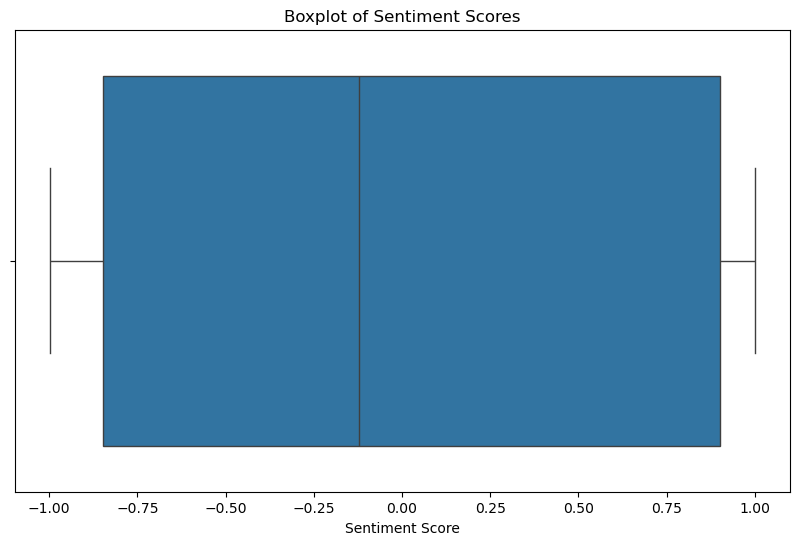

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ba_rv['sentiment'])
plt.title('Boxplot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

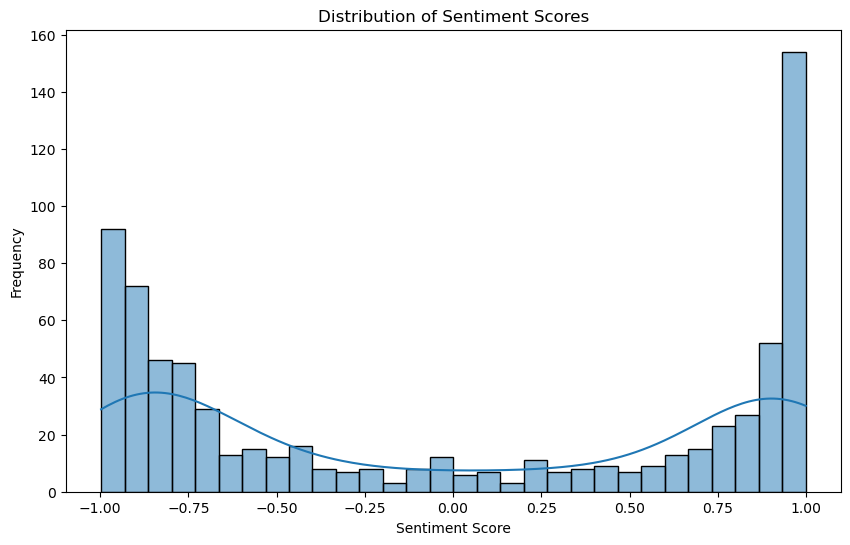

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(ba_rv['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [21]:
ba_rv['sentiment_label'] = ba_rv['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12528\3472902264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_rv['sentiment_label'] = ba_rv['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [22]:
ba_rv.head()

,status,reviews_,sentiment,sentiment_label
1,✅ Trip Verified,"Although like many these days, I avoid BA o...",-0.6663,negative
2,✅ Trip Verified,This flight was British Airways at its very b...,0.9838,positive
4,✅ Trip Verified,"Disappointing service, plane interior and t...",-0.9848,negative
5,✅ Trip Verified,A transit visa is required for my partner t...,0.0258,positive
6,✅ Trip Verified,I was surprised to receive confirmation pre...,0.9201,positive


In [23]:
no_pos_rev=ba_rv['sentiment_label'].value_counts()['positive']
no_pos_rev

351

In [24]:
no_neg_rev=ba_rv['sentiment_label'].value_counts()['negative']
no_neg_rev

380

In [25]:
no_neu_rev=ba_rv['sentiment_label'].value_counts()['neutral']
no_neu_rev

6

Topic Modelling

1. Preprocessing Data
Preprocessing is a crucial step in topic modeling. It involves cleaning and preparing the text data for analysis. Here are the steps involved:

Tokenization: Splitting the text into individual words or tokens.

Removing Stop Words: Eliminating common words that don't contribute much to the meaning (e.g., "and", "the").

Stemming/Lemmatization: Reducing words to their base or root form (e.g., "running" to "run").

In [28]:
corpus = ba_rv['reviews_']

In [29]:
# Code source: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4')  
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# remove stopwords, punctuation, and normalize the corpus
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


In [ ]:
from gensim import corpora

# Creating document-term matrix 
dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

In [ ]:
from gensim.models import LsiModel

# LSA model
lsa = LsiModel(doc_term_matrix, num_topics=3, id2word = dictionary)

# LSA model
print(lsa.print_topics(num_topics=3, num_words=3))

"""
[
(0, '0.555*"water" + 0.489*"percent" + 0.239*"planet"'), 
(1, '0.361*"sleeping" + 0.215*"hour" + 0.215*"still"'), 
(2, '-0.562*"water" + 0.231*"rain" + 0.231*"planet"')
]
"""